In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path, PurePath

In [9]:
def plot_logs(logs, fields, ewm_col=0, log_name='log.txt'):

    # func_name = "plot_utils.py::plot_logs"

    # if not isinstance(logs, list):
    #     if isinstance(logs, PurePath):
    #         logs = [logs]
    #         print(
    #             f"{func_name} info: logs param expects a list argument, converted to list[Path].")
    #     else:
    #         raise ValueError(f"{func_name} - invalid argument for logs parameter.\n \
    #         Expect list[Path] or single Path obj, received {type(logs)}")

    # # verify valid dir(s) and that every item in list is Path object
    # for i, dir in enumerate(logs):
    #     if not isinstance(dir, PurePath):
    #         raise ValueError(
    #             f"{func_name} - non-Path object in logs argument of {type(dir)}: \n{dir}")
    #     if dir.exists():
    #         continue
    #     raise ValueError(
    #         f"{func_name} - invalid directory in logs argument:\n{dir}")

    # load log file(s) and plot

    dfs = [pd.read_json('/home/ayina/MscThesis/DCW/deformable-detr/runs_scratch_MEAN_adam_ciou_LAPROP/log.txt', lines=True)]

    #fig, axs = plt.subplots(ncols=len(fields), figsize=(16, 5))
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))

    for df, color in zip(dfs, sns.color_palette(n_colors=len(logs))):
        #df = df.drop(columns=['test_coco_eval_bbox'])
        for j, field in enumerate(fields):
            if field == 'mAP':
                coco_eval = pd.DataFrame(np.stack(df.test_coco_eval_bbox.dropna().values)[
                                         :, 1]).ewm(com=ewm_col).mean()
                axs[j].plot(coco_eval, c=color)
            else:
                df.columns = df.columns.str.replace("test", "val")
                if 'val_coco_eval_bbox' in df:
                    df = df.drop(columns=['val_coco_eval_bbox'])
                df.interpolate().ewm(com=ewm_col).mean().plot(
                    y=[f'train_{field}', f'val_{field}'],
                    ax=axs[j],
                    #color=[color] * 2,
                    color=[color, 'darkorange'],
                    #style=['-', '--'],
                    style=['-', '-']
                )
    for ax, field in zip(axs, fields):
        #ax.legend([Path(p).name for p in logs])
        ax.set_title(field)
    plt.show()

DEFORMABLE DETR GIOU

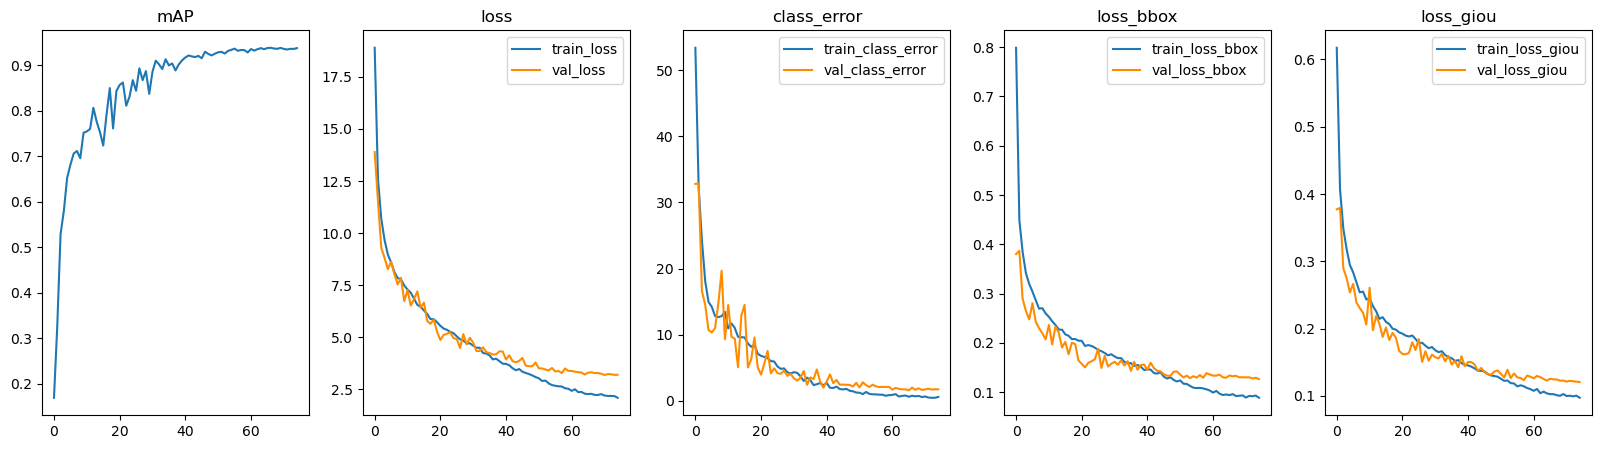

In [4]:
fields_of_interest = ('mAP', 'loss', 'class_error', 'loss_bbox', 'loss_giou')


log_directory = [Path('/runs_scratch_MEAN_adam_giou/')]
plot_logs(log_directory, fields=fields_of_interest)

DEFORMABLE DETR CIOU

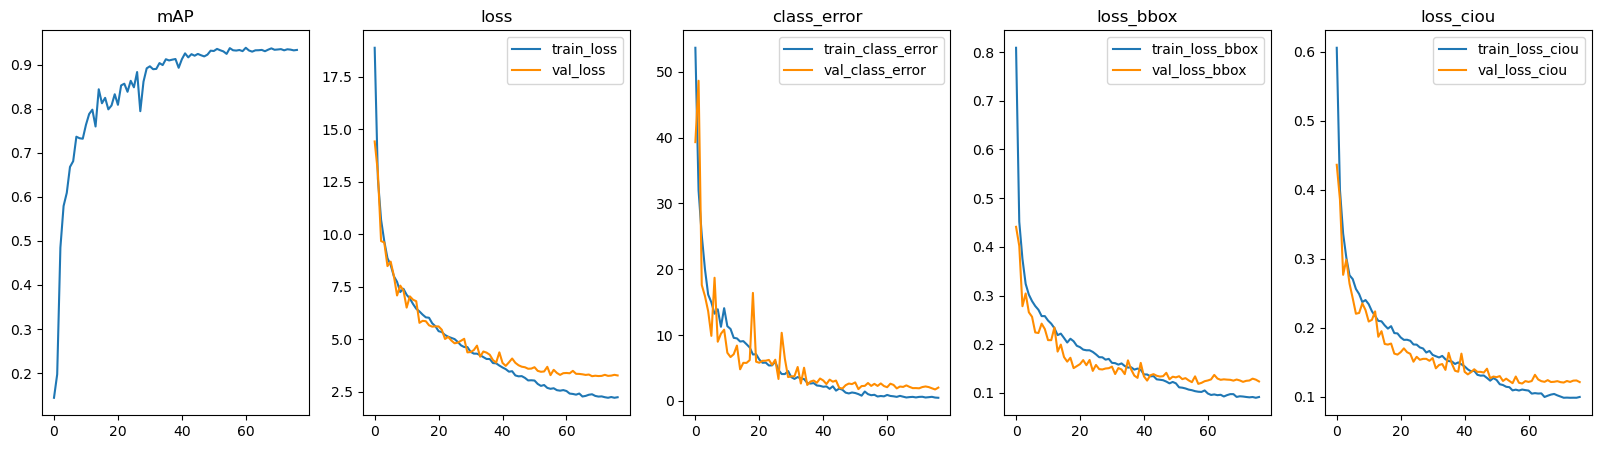

In [7]:
fields_of_interest = ('mAP', 'loss', 'class_error', 'loss_bbox', 'loss_ciou')


log_directory = [Path('/runs_scratch_MEAN_adam_ciou/')]
plot_logs(log_directory, fields=fields_of_interest)

DEFORMABLE DETR CIOU LAPROP

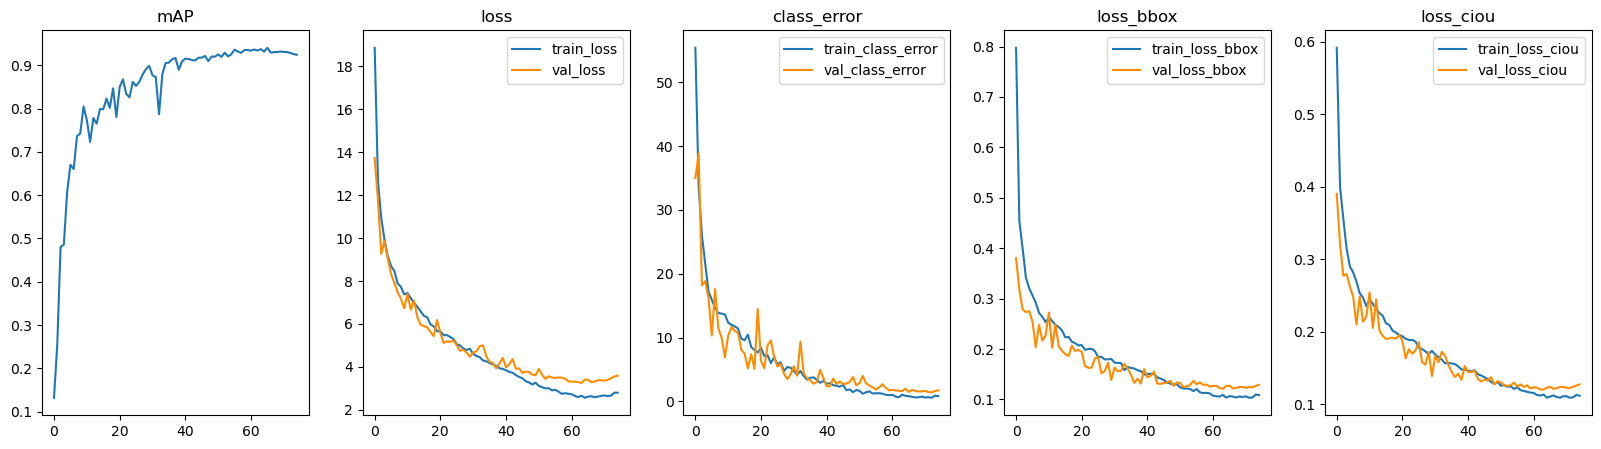

In [10]:
fields_of_interest = ('mAP', 'loss', 'class_error', 'loss_bbox', 'loss_ciou')


log_directory = [Path('/runs_scratch_MEAN_adam_ciou_LAPROP/')]
plot_logs(log_directory, fields=fields_of_interest)